In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed: timeout during initial read of root folder; for more info: https://research.google.com/colaboratory/faq.html#drive-timeout

In [ ]:
import os
image_folder = '/content/drive/MyDrive/student_resource 3/Test_Images'
if os.path.exists(image_folder):
    print("Directory exists and is accessible.")
else:
    print("Directory not found or inaccessible.")


Directory exists and is accessible.


In [ ]:
# import os



# # Check if the directory exists
# if os.path.exists(image_folder):
#     print("Directory exists and is accessible.")
# else:
#     raise FileNotFoundError(f"Directory {image_folder} not found or inaccessible.")


Directory exists and is accessible.


In [ ]:
import pandas as pd

# Define the path to train.csv
test_csv_path = '/content/drive/MyDrive/student_resource 3/dataset/test.csv'

# Load the CSV file
test_df = pd.read_csv(test_csv_path)

# Extract image_name from image_link (assuming it starts at index 36)
test_df['image_name'] = test_df['image_link'].str[36:]

# Check if image_name is added successfully
print(test_df.head())

test_df.to_csv('/content/drive/MyDrive/student_resource 3/dataset/Updated_test.csv')


                                          image_link  group_id  entity_name  \
0  https://m.media-amazon.com/images/I/61I9XdN6OF...    748919  item_weight   
1  https://m.media-amazon.com/images/I/71gSRbyXmo...    916768  item_volume   
2  https://m.media-amazon.com/images/I/61BZ4zrjZX...    459516  item_weight   
3  https://m.media-amazon.com/images/I/612mrlqiI4...    459516  item_weight   
4  https://m.media-amazon.com/images/I/617Tl40LOX...    731432  item_weight   

     entity_value       image_name  
0      500.0 gram  61I9XdN6OFL.jpg  
1         1.0 cup  71gSRbyXmoL.jpg  
2      0.709 gram  61BZ4zrjZXL.jpg  
3      0.709 gram  612mrlqiI4L.jpg  
4  1400 milligram  617Tl40LOXL.jpg  


In [ ]:
import cv2  # OpenCV for image processing
import numpy as np

# Function to process an image (convert to grayscale and resize)
def process_image(image_path):
    try:
        # Read the image
        img = cv2.imread(image_path)
        # Convert to grayscale
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Resize image to a smaller size (e.g., 64x64)
        gray_img = cv2.resize(gray_img, (64, 64))
        return gray_img
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return None


In [ ]:
import glob
image_files = glob.glob('/content/drive/MyDrive/student_resource 3/imagesFinalDest/*.jpg')  # Adjust extension if needed


In [ ]:
image_names = [os.path.basename(img_file) for img_file in image_files]

In [ ]:
image_files[10000:10010]

['/content/drive/MyDrive/student_resource 3/imagesFinalDest/41dakO54RqS.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/41ykCRnvu4L.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/51bW1C0iH+L.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/51wwpbL0PFL.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/61DAXFZCNRL.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/51bFbIJ2RiL.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/61G60MghItL.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/51FULBJH-4L.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/51Vd1iOQkgL.jpg',
 '/content/drive/MyDrive/student_resource 3/imagesFinalDest/61ECInHWJ0L.jpg']

In [ ]:
image_names[10000:10010]

['41dakO54RqS.jpg',
 '41ykCRnvu4L.jpg',
 '51bW1C0iH+L.jpg',
 '51wwpbL0PFL.jpg',
 '61DAXFZCNRL.jpg',
 '51bFbIJ2RiL.jpg',
 '61G60MghItL.jpg',
 '51FULBJH-4L.jpg',
 '51Vd1iOQkgL.jpg',
 '61ECInHWJ0L.jpg']

In [ ]:
# import os
# from PIL import Image, ImageEnhance
# import numpy as np
# from concurrent.futures import ProcessPoolExecutor
# from tqdm import tqdm

# # Function to preprocess an image for OCR (resize, grayscale, enhance contrast)
# def process_image(image_path, output_folder):
#     try:
#         # Open and convert image to grayscale
#         img = Image.open(image_path).convert('L')

#         # Resize the image to 224x224
#         img_resized = img.resize((224, 224))

#         # Enhance contrast (optional step for better OCR)
#         enhancer = ImageEnhance.Contrast(img_resized)
#         img_contrast = enhancer.enhance(2.0)

#         # Save the processed image with the same name in the output folder
#         img_name = os.path.basename(image_path)
#         img_contrast.save(os.path.join(output_folder, img_name))

#         return True  # Successful processing
#     except Exception as e:
#         print(f"Error processing image {image_path}: {e}")
#         return False

# # Helper function to allow parallel processing (no lambdas)
# def process_single_image(args):
#     image_path, output_folder = args
#     return process_image(image_path, output_folder)

# # Function to handle image processing in parallel
# def process_images_in_parallel(image_files, image_folder, output_folder, max_workers=8):
#     image_paths = [(os.path.join(image_folder, img_file), output_folder) for img_file in image_files]

#     # Process images in parallel using ProcessPoolExecutor
#     with ProcessPoolExecutor(max_workers=max_workers) as executor:
#         list(tqdm(executor.map(process_single_image, image_paths), total=len(image_files)))

# # Set the input and output directories
# image_folder = '/content/drive/MyDrive/student_resource 3/imagesFinalDest'
# output_folder = '/content/drive/MyDrive/processed_images_for_OCR'
# os.makedirs(output_folder, exist_ok=True)

# # Get a list of all image files
# image_files = os.listdir(image_folder)

# # Process images in parallel (you can adjust max_workers depending on your system)
# process_images_in_parallel(image_files, image_folder, output_folder, max_workers=8)

# print("All images processed and saved.")


In [ ]:
!pip uninstall pillow
!pip install pillow-simd

Found existing installation: pillow 10.4.0
Uninstalling pillow-10.4.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/PIL/*
    /usr/local/lib/python3.10/dist-packages/pillow-10.4.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/pillow.libs/libXau-154567c4.so.6.0.0
    /usr/local/lib/python3.10/dist-packages/pillow.libs/libbrotlicommon-3ecfe81c.so.1
    /usr/local/lib/python3.10/dist-packages/pillow.libs/libbrotlidec-ba690955.so.1
    /usr/local/lib/python3.10/dist-packages/pillow.libs/libfreetype-be14bf51.so.6.20.1
    /usr/local/lib/python3.10/dist-packages/pillow.libs/libharfbuzz-89381d8f.so.0.60850.0
    /usr/local/lib/python3.10/dist-packages/pillow.libs/libjpeg-77ae51ab.so.62.4.0
    /usr/local/lib/python3.10/dist-packages/pillow.libs/liblcms2-e69eef39.so.2.0.16
    /usr/local/lib/python3.10/dist-packages/pillow.libs/liblzma-13fa198c.so.5.4.5
    /usr/local/lib/python3.10/dist-packages/pillow.libs/libopenjp2-05423b53.so
    /usr/local/lib/python3.10/dist-pac

In [ ]:
import os
from PIL import Image, ImageEnhance
import numpy as np
from concurrent.futures import ProcessPoolExecutor
from tqdm import tqdm
import multiprocessing


def process_image(image_path, output_folder):
    try:

        img = Image.open(image_path).convert('L')


        img_resized = img.resize((224, 224))

        enhancer = ImageEnhance.Contrast(img_resized)
        img_contrast = enhancer.enhance(2.0)

        img_name = os.path.basename(image_path)
        img_contrast.save(os.path.join(output_folder, img_name))

        return True
    except Exception as e:
        print(f"Error processing image {image_path}: {e}")
        return False

def process_single_image(args):
    image_path, output_folder = args
    return process_image(image_path, output_folder)

def process_images_in_parallel(image_files, image_folder, output_folder, max_workers=None):

    if max_workers is None:
        max_workers = multiprocessing.cpu_count()

    image_paths = [(os.path.join(image_folder, img_file), output_folder) for img_file in image_files]


    with ProcessPoolExecutor(max_workers=max_workers) as executor:
        list(tqdm(executor.map(process_single_image, image_paths), total=len(image_files)))

image_folder = '/content/drive/MyDrive/student_resource 3/imagesFinalDest'
output_folder = '/content/drive/MyDrive/processed_images_for_OCR'
os.makedirs(output_folder, exist_ok=True)


image_files = os.listdir(image_folder)

process_images_in_parallel(image_files, image_folder, output_folder, max_workers=8)

print("All images processed and saved.")


 10%|█         | 15017/144382 [17:55<1:30:49, 23.74it/s]

Error processing image /content/drive/MyDrive/student_resource 3/imagesFinalDest/41hO04updoL.jpg: image file is truncated (3 bytes not processed)


 29%|██▉       | 41737/144382 [57:47<1:30:33, 18.89it/s]

Error processing image /content/drive/MyDrive/student_resource 3/imagesFinalDest/61uBhE+kd-L.jpg: cannot identify image file '/content/drive/MyDrive/student_resource 3/imagesFinalDest/61uBhE+kd-L.jpg'
Error processing image /content/drive/MyDrive/student_resource 3/imagesFinalDest/61gxka0yrxL.jpg: cannot identify image file '/content/drive/MyDrive/student_resource 3/imagesFinalDest/61gxka0yrxL.jpg'
Error processing image /content/drive/MyDrive/student_resource 3/imagesFinalDest/61wy2j9uRuL.jpg: cannot identify image file '/content/drive/MyDrive/student_resource 3/imagesFinalDest/61wy2j9uRuL.jpg'
Error processing image /content/drive/MyDrive/student_resource 3/imagesFinalDest/51ClOOsR0CL.jpg: cannot identify image file '/content/drive/MyDrive/student_resource 3/imagesFinalDest/51ClOOsR0CL.jpg'


 29%|██▉       | 41741/144382 [57:49<3:48:36,  7.48it/s]

Error processing image /content/drive/MyDrive/student_resource 3/imagesFinalDest/71XBZf5RIcL.jpg: cannot identify image file '/content/drive/MyDrive/student_resource 3/imagesFinalDest/71XBZf5RIcL.jpg'


 48%|████▊     | 68797/144382 [1:38:45<1:31:03, 13.83it/s]

Error processing image /content/drive/MyDrive/student_resource 3/imagesFinalDest/41Xvpup0p6L.jpg: image file is truncated (3 bytes not processed)


100%|█████████▉| 143670/144382 [3:35:41<00:41, 17.04it/s]

Error processing image /content/drive/MyDrive/student_resource 3/imagesFinalDest/41NH8WgeBOL.jpg: image file is truncated (2 bytes not processed)


100%|██████████| 144382/144382 [3:36:50<00:00, 11.10it/s]


All images processed and saved.


In [ ]:
trainer = pd.read_csv('')

In [ ]:
b = pd.read_csv('/content/drive/MyDrive/processed_batches_NUMPY/labels_batch_9.csv')

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
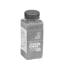

In [ ]:
a[1010]

In [ ]:
b['entity_name']

0        Unknown
1        Unknown
2        Unknown
3        Unknown
4        Unknown
          ...   
14433    Unknown
14434    Unknown
14435    Unknown
14436    Unknown
14437    Unknown
Name: entity_name, Length: 14438, dtype: object